<font color=#786531>E91 Protocol Implementatation and Key Generation</font>

by
Md Shawmoon Azad
YE, MRA

#Installing Dependencies

In [1]:
%pip install qiskit
%pip install pylatexenc
%pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=80888968fd4078278ee42ade7f3c5ee8619bf098dc401616829b312c443a88e9
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 37.7 MB/s eta 0:00:00


#Importing libraries

In [2]:
from qiskit import *
from qiskit_aer import Aer
from qiskit.providers.basic_provider import BasicProvider
import math

In [3]:
# useful additional packages
import numpy as np
import random
# regular expressions module
import re

# importing the QISKit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# import basic plot tools
#from qiskit.tools.visualization import circuit_drawer, plot_histogram

### *Step one: creating the singlets*

In the first step Alice and Bob receive their qubits of the singlet states $\lvert\psi_s\rangle$ created by Charlie.

For our simulation, we need registers with two quantum bits and four classical bits.

In [4]:
# Creating registers
qr = QuantumRegister(2, name="qr")
cr = ClassicalRegister(4, name="cr")

Let us assume that qubits *qr\[0\]* and *qr\[1\]* belong to Alice and Bob respetively.
In classical bits *cr\[0\]* and *cr\[1\]* Alice and Bob store their measurement results, and classical bits *cr\[2\]* and *cr\[3\]* are used by Eve to store her measurement results of Alice's and Bob's qubits.

Now Charlie creates a singlet state:

In [5]:
singlet = QuantumCircuit(qr, cr, name='singlet')
singlet.h(qr[0])
singlet.cx(qr[0],qr[1])

Qubits *qr\[0\]* and *qr\[1\]* are now entangled.
After creating a singlet state, Charlie sends qubit *qr\[0\]* to Alice and qubit *qr\[1\]* to Bob.


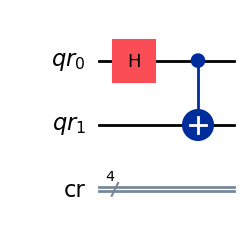

In [6]:
singlet.draw(output = 'mpl')

### *Step two: measuring*

First let us prepare the measurements which will be used by Alice and Bob.
We define $A(\vec{a}_i) = \vec{a}_i \cdot \vec{\sigma}$ and $B(\vec{b}_j) = \vec{b}_j \cdot \vec{\sigma}$ as the spin projection observables used by Alice and Bob for their measurements.
To perform these measurements, the standard basis $Z$ must be rotated to the proper basis when it is needed (see [Superposition](https://quantumexperience.ng.bluemix.net/proxy/tutorial/full-user-guide/002-The_Weird_and_Wonderful_World_of_the_Qubit/020-Superposition.html) and [Entanglement and Bell Tests](https://quantumexperience.ng.bluemix.net/proxy/tutorial/full-user-guide/003-Multiple_Qubits_Gates_and_Entangled_States/050-Entanglement_and_Bell_Tests.html) user guides).
Here we define the notation of possible measurements of Alice and Bob:
![](images/bases.png)

Blocks on the left side can be considered as *detectors* used by the participants to measure $X, W, Z$ and $V$ observables.
Now we prepare the corresponding curcuits.

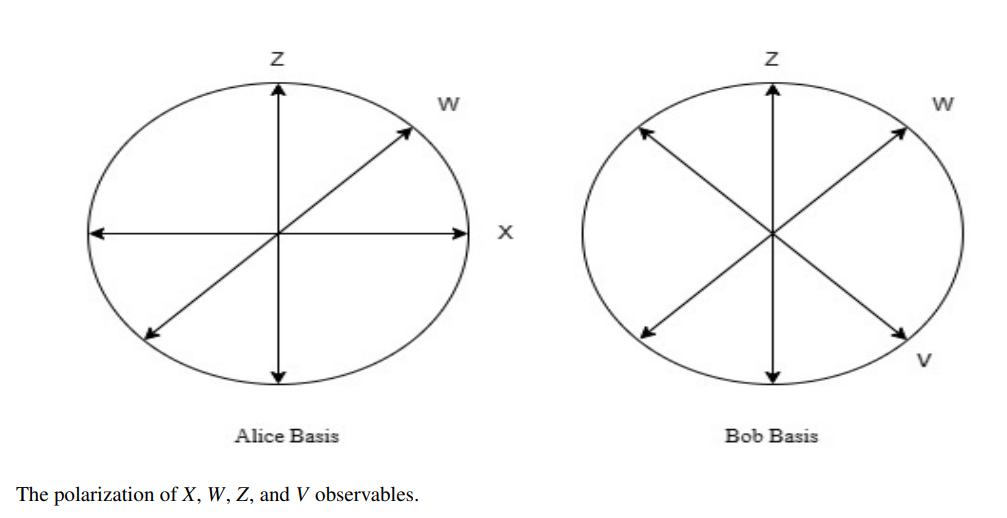

### Alice's measurement circuits

#### measure the spin projection of Alice's qubit onto the a_1 direction (X basis)

In [7]:
measureA1 = QuantumCircuit(qr, cr, name='measureA1')
measureA1.h(qr[0])
measureA1.measure(qr[0],cr[0])

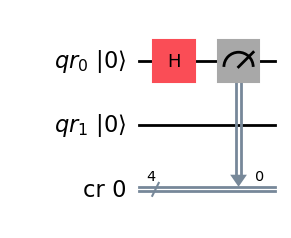

In [8]:
measureA1.draw('mpl',initial_state=True)

### measure the spin projection of Alice's qubit onto the a_2 direction (W basis)

In [9]:
measureA2 = QuantumCircuit(qr, cr, name='measureA2')
measureA2.s(qr[0])
measureA2.h(qr[0])
measureA2.t(qr[0])
measureA2.h(qr[0])
measureA2.measure(qr[0],cr[0])

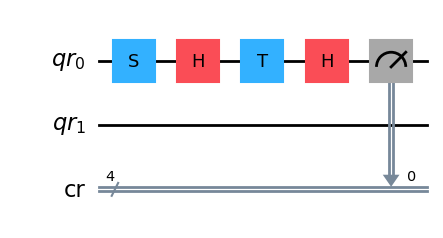

In [10]:
measureA2.draw("mpl")

### measure the spin projection of Alice's qubit onto the a_3 direction (standard Z basis)

In [11]:
measureA3 = QuantumCircuit(qr, cr, name='measureA3')
measureA3.measure(qr[0],cr[0])

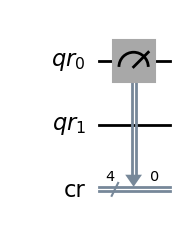

In [12]:
measureA3.draw('mpl')

## Bob's measurement circuits

In [13]:
# measure the spin projection of Bob's qubit onto the b_1 direction (W basis)
measureB1 = QuantumCircuit(qr, cr, name='measureB1')
measureB1.s(qr[1])
measureB1.h(qr[1])
measureB1.t(qr[1])
measureB1.h(qr[1])
measureB1.measure(qr[1],cr[1])

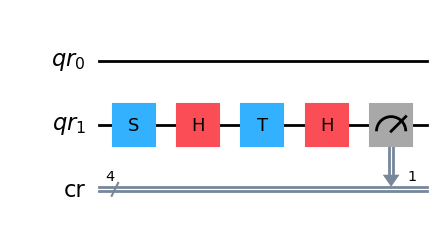

In [14]:
measureB1.draw("mpl")

In [15]:
# measure the spin projection of Bob's qubit onto the b_2 direction (standard Z basis)
measureB2 = QuantumCircuit(qr, cr, name='measureB2')
measureB2.measure(qr[1],cr[1])

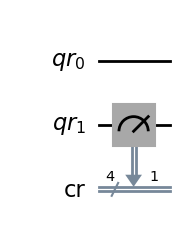

In [16]:
measureB2.draw("mpl")

In [17]:
# measure the spin projection of Bob's qubit onto the b_3 direction (V basis)
measureB3 = QuantumCircuit(qr, cr, name='measureB3')
measureB3.s(qr[1])
measureB3.h(qr[1])
measureB3.tdg(qr[1])
measureB3.h(qr[1])
measureB3.measure(qr[1],cr[1])

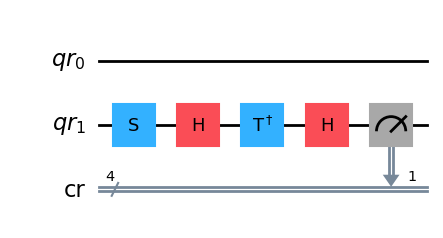

In [18]:
measureB3.draw("mpl")

## Lists of measurement circuits

In [19]:
aliceMeasurements = [measureA1, measureA2, measureA3]
bobMeasurements = [measureB1, measureB2, measureB3]

Supose Alice and Bob want to generate a secret key using $N$ singlet states prepared by Charlie.

In [20]:
numberOfSinglets = 500

The participants must choose the directions onto which they will measure the spin projections of their qubits.
To do this, Alice and Bob create the strings $b$ and $b^{'}$ with randomly generated elements.

In [21]:
aliceMeasurementChoices = [random.randint(1, 3) for i in range(numberOfSinglets)] # string b of Alice
bobMeasurementChoices = [random.randint(1, 3) for i in range(numberOfSinglets)] # string b' of Bob

In [22]:
print(aliceMeasurementChoices)

[1, 1, 2, 3, 3, 2, 1, 2, 2, 3, 3, 2, 3, 1, 3, 1, 2, 2, 3, 3, 2, 1, 3, 2, 3, 3, 1, 3, 2, 2, 3, 2, 1, 3, 1, 3, 3, 1, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 1, 3, 3, 1, 1, 1, 1, 2, 1, 3, 2, 3, 1, 1, 1, 3, 3, 1, 2, 2, 3, 2, 2, 3, 3, 1, 2, 1, 3, 2, 1, 2, 1, 3, 1, 1, 3, 2, 3, 1, 3, 1, 3, 2, 2, 1, 2, 3, 2, 3, 2, 1, 2, 1, 3, 1, 1, 3, 3, 3, 2, 2, 2, 2, 2, 1, 3, 2, 2, 1, 1, 2, 3, 3, 1, 2, 2, 2, 1, 3, 2, 1, 3, 2, 1, 1, 1, 3, 1, 3, 3, 2, 2, 1, 3, 3, 2, 2, 3, 2, 2, 3, 2, 3, 1, 3, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 1, 1, 3, 2, 2, 1, 1, 2, 1, 1, 2, 3, 3, 2, 2, 3, 3, 1, 2, 2, 3, 2, 3, 2, 1, 1, 2, 1, 1, 3, 1, 2, 2, 3, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 3, 3, 1, 1, 3, 1, 1, 3, 3, 2, 1, 2, 2, 2, 2, 3, 3, 3, 2, 3, 1, 1, 3, 3, 1, 2, 2, 1, 2, 2, 2, 1, 3, 2, 2, 3, 1, 1, 3, 2, 2, 1, 1, 1, 1, 2, 3, 1, 3, 1, 2, 2, 2, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3, 2, 3, 3, 1, 1, 3, 3, 3, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 3, 1, 2, 2, 2, 2, 2, 1, 3, 2, 1, 3, 3, 1, 1, 3, 2, 3, 1, 2, 1, 3, 1, 3, 2, 3, 3, 1, 1, 3, 

In [23]:
print(bobMeasurementChoices)

[2, 3, 3, 3, 3, 1, 2, 3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 3, 1, 1, 2, 3, 2, 2, 1, 2, 3, 1, 3, 1, 2, 2, 3, 1, 2, 1, 2, 1, 2, 3, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 3, 3, 3, 2, 1, 3, 3, 1, 3, 2, 1, 3, 3, 3, 1, 3, 3, 1, 2, 1, 1, 1, 3, 2, 3, 1, 2, 1, 2, 3, 2, 2, 1, 1, 2, 3, 2, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 2, 2, 1, 2, 1, 3, 1, 1, 1, 2, 3, 2, 2, 3, 2, 1, 2, 1, 3, 3, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 2, 3, 3, 1, 1, 3, 1, 1, 3, 2, 3, 3, 2, 3, 3, 2, 3, 1, 1, 2, 1, 1, 3, 2, 2, 2, 1, 1, 3, 1, 2, 2, 3, 3, 1, 2, 2, 2, 3, 2, 1, 2, 2, 2, 1, 3, 2, 2, 1, 1, 3, 2, 3, 3, 1, 2, 2, 3, 3, 3, 1, 2, 2, 2, 1, 2, 2, 3, 2, 3, 1, 3, 2, 3, 3, 1, 1, 1, 2, 3, 1, 2, 2, 3, 3, 2, 3, 3, 2, 1, 2, 1, 1, 3, 2, 1, 1, 1, 1, 3, 2, 1, 2, 1, 3, 1, 3, 2, 3, 2, 3, 3, 3, 3, 1, 3, 2, 1, 2, 1, 3, 1, 3, 1, 2, 3, 1, 2, 3, 2, 1, 1, 3, 2, 3, 2, 1, 3, 2, 3, 3, 1, 2, 1, 2, 2, 3, 3, 3, 2, 2, 1, 1, 2, 3, 3, 2, 1, 3, 3, 1, 1, 3, 2, 2, 3, 2, 1, 1, 3, 3, 1, 3, 1, 3, 2, 3, 2, 3, 2, 1, 1, 3, 1, 1, 3, 2, 3, 2, 2, 1, 2, 

Now we combine Charlie's device and Alice's and Bob's detectors into one circuit (singlet + Alice's measurement + Bob's measurement).

In [24]:
circuits = [] # the list in which the created circuits will be stored

for i in range(numberOfSinglets):
    circuitName = singlet & aliceMeasurements[aliceMeasurementChoices[i]-1] & bobMeasurements[bobMeasurementChoices[i]-1]
    circuits.append(circuitName)

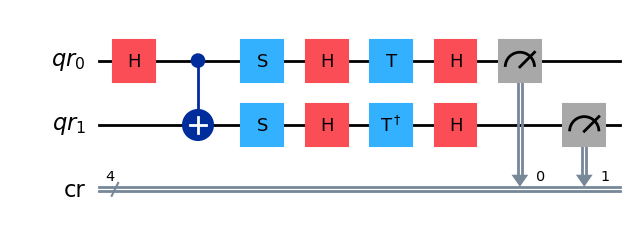

In [25]:
circuits[2].draw(output = 'mpl')

It tells us about the number of the singlet state received from Charlie, and the measurements applied by Alice and Bob.

In the *circuits* list we have stored $N$ (*numberOfSinglets*) circuits similar to those shown in the figure below.


The idea is to model every act of the creation of the singlet state, the distribution of its qubits among the participants and the measurement of the spin projection onto the chosen direction in the E91 protocol by executing each circuit from the *circuits* list with one shot.

## Record Results

In [26]:
results = []
for i in range (numberOfSinglets):
  simulator = Aer.get_backend("qasm_simulator")
  backend = BasicProvider().get_backend('basic_simulator')
  transpiled_circuit = transpile(circuits[i], backend)

  result = backend.run(transpiled_circuit, shots = 1).result()
  results.append(result)

In [27]:
results[7].get_counts().keys()

dict_keys(['0001'])

In [28]:
abPatterns = [
    re.compile('..00$'), # search for the '..00' output (Alice obtained 0 and Bob obtained 0)
    re.compile('..01$'), # search for the '..01' output
    re.compile('..10$'), # search for the '..10' output (Alice obtained 0 and Bob obtained 1)
    re.compile('..11$')  # search for the '..11' output
]

Using these patterns, we can find particular results in the outputs and fill strings the $a$ and $a^{'}$ with the results of Alice's and Bob's measurements.

In [29]:
aliceResults = [] # Alice's results (string a)
bobResults = [] # Bob's results (string a')

for i in range(numberOfSinglets):

    #res = list(result.get_counts(circuits[i]).keys())[0] # extract the key from the dict and transform it to str; execution result of the i-th circuit
    res = str(list(results[i].get_counts().keys())[0])
    if abPatterns[0].search(res): # check if the key is '..00' (if the measurement results are 0,0)
        aliceResults.append(0) # Alice got the result 0
        bobResults.append(0) # Bob got the result 0
    if abPatterns[1].search(res):
        aliceResults.append(1)
        bobResults.append(0)
    if abPatterns[2].search(res): # check if the key is '..10' (if the measurement results are 0,1)
        aliceResults.append(0) # Alice got the result 0
        bobResults.append(1) # Bob got the result 1
    if abPatterns[3].search(res):
        aliceResults.append(1)
        bobResults.append(1)


In [30]:
print(aliceResults)

[0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 

In [31]:
print(bobResults)

[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 

In [ ]:
import time
import re
from qiskit_aer import Aer, AerSimulator
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile


# Step 1: Set up the E91 protocol
qr = QuantumRegister(2, name="qr")
cr = ClassicalRegister(4, name="cr")

start_time = time.time()
# Create singlet state
singlet = QuantumCircuit(qr, cr, name="singlet")
singlet.h(qr[0])
singlet.cx(qr[0], qr[1])

# Alice's measurement circuits
measureA1 = QuantumCircuit(qr, cr, name="measureA1")
measureA1.h(qr[0])
measureA1.measure(qr[0], cr[0])

measureA2 = QuantumCircuit(qr, cr, name="measureA2")
measureA2.s(qr[0])
measureA2.h(qr[0])
measureA2.measure(qr[0], cr[0])

measureA3 = QuantumCircuit(qr, cr, name="measureA3")
measureA3.measure(qr[0], cr[0])

aliceMeasurements = [measureA1, measureA2, measureA3]

# Bob's measurement circuits
measureB1 = QuantumCircuit(qr, cr, name="measureB1")
measureB1.s(qr[1])
measureB1.h(qr[1])
measureB1.measure(qr[1], cr[1])

measureB2 = QuantumCircuit(qr, cr, name="measureB2")
measureB2.measure(qr[1], cr[1])

measureB3 = QuantumCircuit(qr, cr, name="measureB3")
measureB3.s(qr[1])
measureB3.h(qr[1])
measureB3.measure(qr[1], cr[1])

bobMeasurements = [measureB1, measureB2, measureB3]

# Number of singlets
numberOfSinglets = 500

# Randomly choose measurement directions for Alice and Bob
import random
aliceMeasurementChoices = [random.randint(1, 3) for _ in range(numberOfSinglets)]
bobMeasurementChoices = [random.randint(1, 3) for _ in range(numberOfSinglets)]

# Combine circuits for singlet creation and measurements
circuits = []
for i in range(numberOfSinglets):
    # Compose the circuits instead of using the + operator
    circuit = singlet.compose(aliceMeasurements[aliceMeasurementChoices[i] - 1])
    circuit = circuit.compose(bobMeasurements[bobMeasurementChoices[i] - 1])
    circuits.append(circuit)


# Simulate and record results
results = []
simulator = AerSimulator()
for circuit in circuits:
    transpiled_circuit = transpile(circuit, simulator)
    result = simulator.run(transpiled_circuit, shots=1).result()
    results.append(result)

# Extract keys from the results
abPatterns = [
    re.compile("..00"),  # Alice and Bob both measure 0
    re.compile("..01"),  # Alice measures 0, Bob measures 1
    re.compile("..10"),  # Alice measures 1, Bob measures 0
    re.compile("..11"),  # Alice and Bob both measure 1
]

aliceResults = []
bobResults = []

for result in results:
    counts = result.get_counts()
    for key in counts.keys():
        if abPatterns[0].search(key):  # Both Alice and Bob measure 0
            aliceResults.append(0)
            bobResults.append(0)
        elif abPatterns[1].search(key):  # Alice measures 0, Bob measures 1
            aliceResults.append(0)
            bobResults.append(1)
        elif abPatterns[2].search(key):  # Alice measures 1, Bob measures 0
            aliceResults.append(1)
            bobResults.append(0)
        elif abPatterns[3].search(key):  # Both Alice and Bob measure 1
            aliceResults.append(1)
            bobResults.append(1)

# Compare Alice's and Bob's results to generate the final key
aliceKey = []
bobKey = []
for i in range(len(aliceMeasurementChoices)):
    if aliceMeasurementChoices[i] == 3 and bobMeasurementChoices[i] == 2:
        aliceKey.append(aliceResults[i])
        bobKey.append(bobResults[i])

# Ensure the keys match
assert aliceKey == bobKey, "Keys do not match. Check your protocol implementation!"

# Measure the key generation rate
key_length = len(aliceKey)
end_time = time.time()

# Calculate key generation time and rate
total_time = (end_time - start_time)  # in seconds
key_generation_rate = key_length / total_time   # bits per second

print(f"Key Length: {key_length} bits")
print(f"Total Time Taken: {total_time:.2f} seconds")
print(f"Key Generation Rate: {key_generation_rate:.2f} bits/second")
print(aliceKey)


Key Length: 56 bits
Total Time Taken: 69.14 seconds
Key Generation Rate: 0.81 bits/second
[0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1]


## Revealing Base

In the previos step we have stored the measurement results of Alice and Bob in the *aliceResults* and *bobResults* lists (strings $a$ and $a^{'}$).
Now the participants compare their strings $b$ and $b^{'}$ via the public classical channel.
If Alice and Bob have measured the spin projections of their qubits of the *i*-th singlet onto the same direction, then Alice records the result $a_i$ as the bit of the string $k$, and Bob records the result $-a_i$ as the bit of the string $k^{'}$.

In [ ]:
aliceKey = [] # Alice's key string k
bobKey = [] # Bob's key string k'

# comparing the stings with measurement choices
for i in range(numberOfSinglets):
    # if Alice and Bob have measured the spin projections onto the a_2/b_1 or a_3/b_2 directions
    if (aliceMeasurementChoices[i] == 2 and bobMeasurementChoices[i] == 1) or (aliceMeasurementChoices[i] == 3 and bobMeasurementChoices[i] == 2):
        aliceKey.append(aliceResults[i]) # record the i-th result obtained by Alice as the bit of the secret key k
        bobKey.append(bobResults[i])

keyLength = len(aliceKey) # length of the secret key
print("key length:", keyLength)

key length: 118


The keys $k$ and $k'$ are now stored in the *aliceKey* and *bobKey* lists, respectively.
The remaining results which were not used to create the keys can now be revealed.

It is important for Alice and Bob to have the same keys, i.e. strings $k$ and $k^{'}$ must be equal.
Let us compare the bits of strings $k$ and $k^{'}$ and find out how many there are mismatches in the keys.

In [ ]:
abKeyMismatches = 0 # number of mismatching bits in Alice's and Bob's keys

for j in range(keyLength):
    if aliceKey[j] != bobKey[j]:
        abKeyMismatches += 1
print("Key Mismatch: ", abKeyMismatches)

Key Mismatch:  62


In [ ]:
print(aliceKey)

[0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0]


In [ ]:
print(bobKey)

[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1]


Sample of e91 and salt hashing
Now we got our KEY-2 by salt hashing the KEY-1 that Alice and Bob shares by following E91 protocol.


In [ ]:
import time
import hashlib
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
import pandas as pd

# Function to measure key generation rate
def measure_key_generation_rate(num_singlets, secret_salt, secret_rounds):
    qr = QuantumRegister(2, name="qr")
    cr = ClassicalRegister(4, name="cr")

    # Create singlet state
    singlet = QuantumCircuit(qr, cr, name="singlet")
    singlet.h(qr[0])
    singlet.cx(qr[0], qr[1])

    # Alice's measurement circuits
    measureA3 = QuantumCircuit(qr, cr, name="measureA3")
    measureA3.measure(qr[0], cr[0])

    # Bob's measurement circuits
    measureB2 = QuantumCircuit(qr, cr, name="measureB2")
    measureB2.measure(qr[1], cr[1])

    # Combine circuits for singlet creation and measurements
    circuits = []
    for _ in range(num_singlets):
        circuit = singlet.compose(measureA3)
        circuit = circuit.compose(measureB2)
        circuits.append(circuit)

    # Simulate and record results
    simulator = AerSimulator()
    transpiled_circuits = transpile(circuits, simulator)
    result = simulator.run(transpiled_circuits, shots=1).result()

    # Extract keys from the results
    alice_results = []
    bob_results = []

    for circuit_result in result.results:
        # Use .data() method to extract 'counts'
        counts = circuit_result.data["counts"]  # Corrected usage of .data()
        for key, value in counts.items():
            if key.endswith("00"):  # Both Alice and Bob measure 0
                alice_results.append(0)
                bob_results.append(0)
            elif key.endswith("11"):  # Both Alice and Bob measure 1
                alice_results.append(1)
                bob_results.append(1)

    # Ensure the keys match
    alice_key = alice_results[:len(alice_results) // 2]
    bob_key = bob_results[:len(bob_results) // 2]

    # Convert AliceKey to binary
    alice_key_binary = ''.join(str(bit) for bit in alice_key)

    # Strengthen the binary key
    if len(alice_key_binary) == 0:
        return 0, 0, 0  # Avoid division by zero
    alice_key_2 = generate_strong_key(alice_key_binary)

    # Measure time and key generation rate
    start_time = time.time()
    key_length = len(alice_key_2)
    end_time = time.time()
    total_time = end_time - start_time
    key_generation_rate = key_length / total_time if total_time > 0 else 0

    return key_length, total_time, key_generation_rate


# Function to strengthen the binary key
def generate_strong_key(binary_string, iterations=10):
    """
    Strengthens the binary key by hashing it iteratively.
    """
    hash_result = binary_string
    for _ in range(iterations):
        hash_result = hashlib.sha256(hash_result.encode()).hexdigest()
    return hash_result[:300]  # Return the first 300 bits

# Generate the table for key generation rates
def create_key_generation_rate_table(runs):
    results = []
    for num_singlets in runs:
        key_length, total_time, key_generation_rate = measure_key_generation_rate(
            num_singlets, "AliceOnlySalt", 9
        )
        results.append({
            "Number of Singlets": num_singlets,
            "Key Length (bits)": key_length,
            "Total Time (seconds)": round(total_time, 2),
            "Key Generation Rate (bits/second)": round(key_generation_rate, 2)
        })

    # Create a DataFrame to display the table
    df = pd.DataFrame(results)
    return df

# Example runs with varying number of singlets
runs = [100, 200, 300, 400, 500]  # Change as needed
key_generation_rate_table = create_key_generation_rate_table(runs)

# Display the table
print(key_generation_rate_table)


TypeError: 'ExperimentResultData' object is not subscriptable

In [ ]:
import time
import re
import hashlib
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile

# Feistel Encryption with Secret Salt and Rounds
def feistel_encrypt_with_secret(input_value, secret_salt, secret_rounds):
    """
    Encrypts the input using Feistel structure with a secret salt and rounds.
    """
    # Split input into two halves
    left = input_value[:len(input_value) // 2]
    right = input_value[len(input_value) // 2:]

    # Perform Feistel rounds
    for round in range(secret_rounds):
        # Create a round function using the secret salt
        round_function = hashlib.sha256((right + str(round) + secret_salt).encode()).hexdigest()[:len(left)]

        # XOR the round function with the left half
        new_left = ''.join(chr(ord(a) ^ ord(b)) for a, b in zip(left, round_function))

        # Swap halves for the next round
        left, right = right, new_left

    # Combine final left and right halves
    return left + right


def string_to_binary(input_string):
    """
    Converts a string to its binary representation.
    """
    return ''.join(format(ord(char), '08b') for char in input_string)


def generate_strong_key(binary_string, iterations=10):
    """
    Strengthens the binary key by hashing it iteratively.
    """
    hash_result = binary_string
    for _ in range(iterations):
        # Hash the binary string using SHA-256
        hash_result = hashlib.sha256(hash_result.encode()).hexdigest()
    return hash_result[:300]  # Return the first 300 bits


# Step 1: Set up the E91 protocol
qr = QuantumRegister(2, name="qr")
cr = ClassicalRegister(4, name="cr")

start_time = time.time()

# Create singlet state
singlet = QuantumCircuit(qr, cr, name="singlet")
singlet.h(qr[0])
singlet.cx(qr[0], qr[1])

# Alice's measurement circuits
measureA1 = QuantumCircuit(qr, cr, name="measureA1")
measureA1.h(qr[0])
measureA1.measure(qr[0], cr[0])

measureA2 = QuantumCircuit(qr, cr, name="measureA2")
measureA2.s(qr[0])
measureA2.h(qr[0])
measureA2.measure(qr[0], cr[0])

measureA3 = QuantumCircuit(qr, cr, name="measureA3")
measureA3.measure(qr[0], cr[0])

aliceMeasurements = [measureA1, measureA2, measureA3]

# Bob's measurement circuits
measureB1 = QuantumCircuit(qr, cr, name="measureB1")
measureB1.s(qr[1])
measureB1.h(qr[1])
measureB1.measure(qr[1], cr[1])

measureB2 = QuantumCircuit(qr, cr, name="measureB2")
measureB2.measure(qr[1], cr[1])

measureB3 = QuantumCircuit(qr, cr, name="measureB3")
measureB3.s(qr[1])
measureB3.h(qr[1])
measureB3.measure(qr[1], cr[1])

bobMeasurements = [measureB1, measureB2, measureB3]

# Number of singlets
numberOfSinglets = 500

# Randomly choose measurement directions for Alice and Bob
import random
aliceMeasurementChoices = [random.randint(1, 3) for _ in range(numberOfSinglets)]
bobMeasurementChoices = [random.randint(1, 3) for _ in range(numberOfSinglets)]

# Combine circuits for singlet creation and measurements
circuits = []
for i in range(numberOfSinglets):
    circuit = singlet.compose(aliceMeasurements[aliceMeasurementChoices[i] - 1])
    circuit = circuit.compose(bobMeasurements[bobMeasurementChoices[i] - 1])
    circuits.append(circuit)

# Simulate and record results
results = []
simulator = AerSimulator()
for circuit in circuits:
    transpiled_circuit = transpile(circuit, simulator)
    result = simulator.run(transpiled_circuit, shots=1).result()
    results.append(result)

# Extract keys from the results
abPatterns = [
    re.compile("..00"),  # Alice and Bob both measure 0
    re.compile("..01"),  # Alice measures 0, Bob measures 1
    re.compile("..10"),  # Alice measures 1, Bob measures 0
    re.compile("..11"),  # Alice and Bob both measure 1
]

aliceResults = []
bobResults = []

for result in results:
    counts = result.get_counts()
    for key in counts.keys():
        if abPatterns[0].search(key):  # Both Alice and Bob measure 0
            aliceResults.append(0)
            bobResults.append(0)
        elif abPatterns[1].search(key):  # Alice measures 0, Bob measures 1
            aliceResults.append(0)
            bobResults.append(1)
        elif abPatterns[2].search(key):  # Alice measures 1, Bob measures 0
            aliceResults.append(1)
            bobResults.append(0)
        elif abPatterns[3].search(key):  # Both Alice and Bob measure 1
            aliceResults.append(1)
            bobResults.append(1)

# Compare Alice's and Bob's results to generate the final key
aliceKey = []
bobKey = []
for i in range(len(aliceMeasurementChoices)):
    if aliceMeasurementChoices[i] == 3 and bobMeasurementChoices[i] == 2:
        aliceKey.append(aliceResults[i])
        bobKey.append(bobResults[i])

# Ensure the keys match
assert aliceKey == bobKey, "Keys do not match. Check your protocol implementation!"

# Key mismatch counter
abKeyMismatches = 0
for j in range(len(aliceKey)):
    if aliceKey[j] != bobKey[j]:
        abKeyMismatches += 1
print("Key Mismatch: ", abKeyMismatches)

# Convert AliceKey to binary
aliceKeyBinary = ''.join(str(bit) for bit in aliceKey)

# Step 2: Feistel encryption
while len(aliceKeyBinary) % 8 != 0:
    aliceKeyBinary += '0'  # Padding to ensure a multiple of 8 bits

plaintext = ''.join(chr(int(aliceKeyBinary[i:i + 8], 2)) for i in range(0, len(aliceKeyBinary), 8))

# Alice encrypts
secret_salt = "AliceOnlySaltyes"  # Alice's secret salt
secret_rounds = 9                 # Alice's secret number of rounds
alice_encrypted = feistel_encrypt_with_secret(plaintext, secret_salt, secret_rounds)

# Convert Alice's encrypted result to binary
alice_encrypted_binary = string_to_binary(alice_encrypted)

# Generate a stronger key of 300 bits
alice_key_2 = generate_strong_key(alice_encrypted_binary)

# Display results
print(f"Key Length: {key_length} bits")
print(f"Total Time Taken: {total_time:.2f} seconds")
print(f"Key Generation Rate: {key_generation_rate:.2f} bits/second")
print(aliceKey)
print("Alice's Encrypted Output (Text):", alice_encrypted)
print("Alice's Encrypted Output (Binary - Full):", alice_encrypted_binary)
print("Length of Salted Hashed Key(KEY2):", len(alice_key_2))
print("Hashed Key(KEY2) (300 bits):", alice_key_2)


Used AES to encrypt a plaintext. Used the newly formed KEY2(which came by hashing KEY1) to perform the encryption

In [ ]:
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
import os

def aes_gcm_encrypt(plaintext, key):
    """
    Encrypts the plaintext using AES-GCM with the provided key.
    """
    # Ensure the key is bytes-like and 256 bits (32 bytes)
    if isinstance(key, str):  # Convert string to bytes
        key = key.encode()
    key = key[:32]  # Ensure it's exactly 32 bytes (256-bit)

    # Generate a 12-byte Initialization Vector (IV) for AES-GCM
    iv = os.urandom(12)  # Recommended size for GCM IV

    # Create AES-GCM cipher
    cipher = Cipher(algorithms.AES(key), modes.GCM(iv))
    encryptor = cipher.encryptor()

    # Encrypt the plaintext
    ciphertext1 = encryptor.update(plaintext.encode()) + encryptor.finalize()

    return ciphertext1, iv, encryptor.tag


alice_key_2 = alice_key_2[:32]  # Truncate to 32 bytes (256-bit)

# Define the plaintext to encrypt
plaintext = "This is the plaintext data to encrypt."

# Encrypt the plaintext
ciphertext1, iv, tag = aes_gcm_encrypt(plaintext, alice_key_2)

# Display the results
print("Ciphertext1 (Hex):", ciphertext1.hex())
print("Initialization Vector (IV, Hex):", iv.hex())
print("Authentication Tag (Hex):", tag.hex())


Generated Key3 from key1 by a selection pattern

In [ ]:
import hashlib

def generate_key3(key1, selection_pattern="even"):
    # Select specific bits based on the pattern
    if selection_pattern == "even":
        selected_bits = key1[::2]  # Select even-indexed bits
    elif selection_pattern == "odd":
        selected_bits = key1[1::2]  # Select odd-indexed bits
    else:
        # Custom pattern: Example - Select first half of Key 1
        selected_bits = key1[:len(key1)//2]

    # Convert selected bits to a string
    key3_str = ''.join(map(str, selected_bits))

    # Optionally hash the selected bits to strengthen Key 3
    hash_obj = hashlib.sha256(key3_str.encode())
    key3 = hash_obj.digest()[:16]  # Truncate to 16 bytes for AES-128

    return key3

# Example Usage
key1 = aliceKey # Replace with E91 Key 1
key3 = generate_key3(key1, selection_pattern="even")
print("Key 3:", key3.hex())


re-encrypted the ciphertex1 using KEY3 that we generated earlier.
we got ciphertext 2.

In [ ]:
import os
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes

# Function to generate Key 3 directly from Key 1
def generate_key3(key1, selection_pattern="even"):
    """
    Generate Key 3 based on Key 1 with a specific selection pattern.
    """
    # Select specific bits based on the pattern
    if selection_pattern == "even":
        selected_bits = key1[::2]  # Select even-indexed bits
    elif selection_pattern == "odd":
        selected_bits = key1[1::2]  # Select odd-indexed bits
    else:
        # Custom pattern: Example - Select first half of Key 1
        selected_bits = key1[:len(key1)//2]

    # Convert selected bits to bytes directly
    key3_bytes = bytearray(int(''.join(map(str, selected_bits[i:i+8])), 2) for i in range(0, len(selected_bits), 8))

    while len(key3_bytes) < 32:
        key3_bytes.append(0)  # Pad with zeros if necessary
    return bytes(key3_bytes[:32])  # Truncate if longer than 16 bytes

# AES-GCM encryption using Key 3
def aes_gcm_encrypt(ciphertext1, key3):
    """
    Encrypts the plaintext using AES-GCM with the provided key.
    """
    # Ensure the key is bytes-like
    if isinstance(key3, str):
        key3 = key3.encode()
    key3 = key3[:32]  # Ensure it's exactly 16 bytes (128-bit for AES)

    # Generate a 12-byte Initialization Vector (IV) for AES-GCM
    iv2 = os.urandom(12)  # Recommended size for GCM IV

    # Create AES-GCM cipher
    cipher = Cipher(algorithms.AES(key3), modes.GCM(iv2))
    encryptor = cipher.encryptor()

    # Encrypt the plaintext
    ciphertext2 = encryptor.update(ciphertext1) + encryptor.finalize()

    return ciphertext2, iv, encryptor.tag

# Example Usage
key1 = aliceKey  # Replace with E91 Key 1 generated earlier
key3 = generate_key3(key1, selection_pattern="even")
print("Key 3 (Hex):", key3.hex())

# Encrypt plaintext using Key 3
plaintext = ciphertext1  # Ensure ciphertext1 is bytes
ciphertext2, iv2, tag = aes_gcm_encrypt(plaintext, key3)

# Display the results
print("Ciphertext2 (Hex):", ciphertext2.hex())
print("Initialization Vector (IV2, Hex):", iv2.hex())
print("Authentication Tag (Hex):", tag.hex())


Decrypt Ciphertext2 using key 3

In [ ]:
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes

def aes_gcm_decrypt(ciphertext2, key3_bytes, iv2, tag):
    """
    Decrypts the ciphertext using AES-GCM with the provided key, IV, and authentication tag.

    Args:
        ciphertext2 (bytes): The encrypted ciphertext.
        key (bytes): The AES decryption key (16 bytes for AES-128 or 32 bytes for AES-256).
        iv (bytes): The initialization vector (12 bytes for AES-GCM).
        tag (bytes): The authentication tag.

    Returns:
        str: The decrypted plaintext.
    """
    # Create AES-GCM cipher
    cipher = Cipher(algorithms.AES(key3), modes.GCM(iv2, tag))
    decryptor = cipher.decryptor()

    # Decrypt the ciphertext
    plaintext = decryptor.update(ciphertext2) + decryptor.finalize()

    return plaintext.decode()

# Use the previously generated `key3` (in bytes)
print("Key 3 (Previously Generated, Hex):", key3.hex())
key3_bytes = bytes.fromhex(key3.hex())
print("Key 3 (Bytes):", key3_bytes)

# Decrypt ciphertext2 using the same `key3`
try:
    decrypted_plaintext = aes_gcm_decrypt(ciphertext2, key3_bytes, iv2, tag)
    print("Decrypted Plaintext (Bob):", decrypted_plaintext)
except Exception as e:
    print("Decryption failed:", e)


Encryption with the time measured.

In [ ]:
import os
import time
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes


start_time_1 = time.perf_counter()
# AES-GCM encryption for ciphertext1
def aes_gcm_encrypt(plaintext, key):
    """
    Encrypts the plaintext using AES-GCM with the provided key.
    """
    if isinstance(key, str):  # Convert string to bytes
        key = key.encode()
    key = key[:32]  # Ensure it's exactly 32 bytes (256-bit)

    iv = os.urandom(12)  # Generate IV
    cipher = Cipher(algorithms.AES(key), modes.GCM(iv))
    encryptor = cipher.encryptor()

    ciphertext1 = encryptor.update(plaintext.encode()) + encryptor.finalize()

    return ciphertext1, iv, encryptor.tag

# AES-GCM encryption for ciphertext2
def aes_gcm_encrypt_with_key3(ciphertext1, key3):
    """
    Encrypts ciphertext1 using AES-GCM with the provided key3.
    """
    if isinstance(key3, str):  # Convert string to bytes
        key3 = key3.encode()
    key3 = key3[:32]  # Ensure it's exactly 32 bytes (256-bit)

    iv2 = os.urandom(12)  # Generate IV
    cipher = Cipher(algorithms.AES(key3), modes.GCM(iv2))
    encryptor = cipher.encryptor()

    ciphertext2 = encryptor.update(ciphertext1) + encryptor.finalize()

    return ciphertext2, iv2, encryptor.tag

# Measure encryption times
# Encryption for ciphertext1
alice_key_2 = alice_key_2[:32]  # Ensure key is 256-bit
plaintext = "This is the plaintext data to encrypt."

ciphertext1, iv, tag = aes_gcm_encrypt(plaintext, alice_key_2)
end_time_1 = time.perf_counter()

encryption_time_1 = end_time_1 - start_time_1
print(f"Ciphertext1 Encryption Time: {encryption_time_1:.6f} seconds")
print("Ciphertext1 (Hex):", ciphertext1.hex())

start_time_2 = time.perf_counter()
# Generate Key3
def generate_key3(key1, selection_pattern="even"):
    if selection_pattern == "even":
        selected_bits = key1[::2]
    elif selection_pattern == "odd":
        selected_bits = key1[1::2]
    else:
        selected_bits = key1[:len(key1)//2]

    key3_bytes = bytearray(int(''.join(map(str, selected_bits[i:i+8])), 2) for i in range(0, len(selected_bits), 8))
    while len(key3_bytes) < 32:
        key3_bytes.append(0)
    return bytes(key3_bytes[:32])

key1 = aliceKey
key3 = generate_key3(key1, selection_pattern="even")
print("Key 3 (Hex):", key3.hex())

# Encryption for ciphertext2

ciphertext2, iv2, tag2 = aes_gcm_encrypt_with_key3(ciphertext1, key3)
end_time_2 = time.perf_counter()

encryption_time_2 = end_time_2 - start_time_2
print(f"Ciphertext2 Encryption Time: {encryption_time_2:.6f} seconds")
print("Ciphertext2 (Hex):", ciphertext2.hex())


In [ ]:
import os
import time
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes


# AES-GCM encryption for file
def aes_gcm_encrypt_file(file_data, key):
    """
    Encrypts the contents of a file using AES-GCM with the provided key.
    """
    if isinstance(key, str):  # Convert string to bytes
        key = key.encode()
    key = key[:32]  # Ensure it's exactly 32 bytes (256-bit)

    iv = os.urandom(12)  # Generate IV
    cipher = Cipher(algorithms.AES(key), modes.GCM(iv))
    encryptor = cipher.encryptor()

    ciphertext = encryptor.update(file_data) + encryptor.finalize()

    return ciphertext, iv, encryptor.tag


# AES-GCM re-encryption with Key 3
def aes_gcm_reencrypt_with_key3(file_data, key3):
    """
    Re-encrypts the contents of a file using AES-GCM with Key 3.
    """
    if isinstance(key3, str):  # Convert string to bytes
        key3 = key3.encode()
    key3 = key3[:32]  # Ensure it's exactly 32 bytes (256-bit)

    iv2 = os.urandom(12)  # Generate IV
    cipher = Cipher(algorithms.AES(key3), modes.GCM(iv2))
    encryptor = cipher.encryptor()

    ciphertext = encryptor.update(file_data) + encryptor.finalize()

    return ciphertext, iv2, encryptor.tag


# Key 3 Generation
def generate_key3(key1, selection_pattern="even"):
    if selection_pattern == "even":
        selected_bits = key1[::2]
    elif selection_pattern == "odd":
        selected_bits = key1[1::2]
    else:
        selected_bits = key1[:len(key1)//2]

    key3_bytes = bytearray(int(''.join(map(str, selected_bits[i:i+8])), 2) for i in range(0, len(selected_bits), 8))
    while len(key3_bytes) < 32:
        key3_bytes.append(0)
    return bytes(key3_bytes[:32])


# File Encryption Process
file_path = r"C:\Users\USER\Desktop\QKD Lattice Kyber\10KB.txt"  # Path to the text file to encrypt
alice_key_2 = alice_key_2[:32]  # Ensure key is 256-bit

# Read file data
with open(file_path, "rb") as f:
    file_data = f.read()

# Step 1: Encrypt the file data
start_time_1 = time.perf_counter()
ciphertext1, iv, tag = aes_gcm_encrypt_file(file_data, alice_key_2)
end_time_1 = time.perf_counter()

encryption_time_1 = end_time_1 - start_time_1
print(f"File Encryption Time (Stage 1): {encryption_time_1:.6f} seconds")
print("Ciphertext1 (Hex):", ciphertext1.hex())

# Step 2: Generate Key 3
key1 = aliceKey  # Ensure aliceKey is properly initialized before this code
key3 = generate_key3(key1, selection_pattern="even")
print("Key 3 (Hex):", key3.hex())

# Step 3: Re-encrypt the file data
start_time_2 = time.perf_counter()
ciphertext2, iv2, tag2 = aes_gcm_reencrypt_with_key3(ciphertext1, key3)
end_time_2 = time.perf_counter()

encryption_time_2 = end_time_2 - start_time_2
print(f"File Re-Encryption Time (Stage 2): {encryption_time_2:.6f} seconds")
print("Ciphertext2 (Hex):", ciphertext2.hex())

# Save the encrypted file (Optional)
encrypted_file_path = r"C:\Users\USER\Desktop\QKD Lattice Kyber\encrypted_10KB.txt"
with open(encrypted_file_path, "wb") as f:
    f.write(ciphertext2)
print(f"Re-encrypted file saved as {encrypted_file_path}")


In [ ]:
import os
import time
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes

# Function to encrypt a file
def process_file(file_path, alice_key_2, key1):
    # Read the file data
    with open(file_path, "rb") as f:
        file_data = f.read()

    # Step 1: Encrypt the file data
    start_time_1 = time.perf_counter()
    ciphertext1, iv, tag = aes_gcm_encrypt_file(file_data, alice_key_2)
    end_time_1 = time.perf_counter()

    encryption_time_1 = end_time_1 - start_time_1
    print(f"File: {file_path}")
    print(f"File Encryption Time (Stage 1): {encryption_time_1:.6f} seconds")
    print("Ciphertext1 (Hex):", ciphertext1.hex())

    # Step 2: Generate Key 3
    key3 = generate_key3(key1, selection_pattern="even")
    print("Key 3 (Hex):", key3.hex())

    # Step 3: Re-encrypt the file data
    start_time_2 = time.perf_counter()
    ciphertext2, iv2, tag2 = aes_gcm_reencrypt_with_key3(ciphertext1, key3)
    end_time_2 = time.perf_counter()

    encryption_time_2 = end_time_2 - start_time_2
    print(f"File Re-Encryption Time (Stage 2): {encryption_time_2:.6f} seconds")
    print("Ciphertext2 (Hex):", ciphertext2.hex())

    # Save the re-encrypted file
    encrypted_file_path = file_path.replace(".txt", "_encrypted.txt")
    with open(encrypted_file_path, "wb") as f:
        f.write(ciphertext2)
    print(f"Re-encrypted file saved as {encrypted_file_path}\n")

# Functions for AES-GCM encryption
def aes_gcm_encrypt_file(file_data, key):
    if isinstance(key, str):
        key = key.encode()
    key = key[:32]

    iv = os.urandom(12)
    cipher = Cipher(algorithms.AES(key), modes.GCM(iv))
    encryptor = cipher.encryptor()

    ciphertext = encryptor.update(file_data) + encryptor.finalize()
    return ciphertext, iv, encryptor.tag

def aes_gcm_reencrypt_with_key3(file_data, key3):
    if isinstance(key3, str):
        key3 = key3.encode()
    key3 = key3[:32]

    iv2 = os.urandom(12)
    cipher = Cipher(algorithms.AES(key3), modes.GCM(iv2))
    encryptor = cipher.encryptor()

    ciphertext = encryptor.update(file_data) + encryptor.finalize()
    return ciphertext, iv2, encryptor.tag

def generate_key3(key1, selection_pattern="even"):
    if selection_pattern == "even":
        selected_bits = key1[::2]
    elif selection_pattern == "odd":
        selected_bits = key1[1::2]
    else:
        selected_bits = key1[:len(key1)//2]

    key3_bytes = bytearray(int(''.join(map(str, selected_bits[i:i+8])), 2) for i in range(0, len(selected_bits), 8))
    while len(key3_bytes) < 32:
        key3_bytes.append(0)
    return bytes(key3_bytes[:32])

# Main Script
directory = r"C:\Users\USER\Desktop\QKD Lattice Kyber"  # Replace with your directory path
alice_key_2 = alice_key_2[:32]  # Replace with your 256-bit key
key1 = aliceKey  # Replace with E91 Key 1

for file_name in os.listdir(directory):
    if file_name.endswith(".txt") and not file_name.endswith("_encrypted.txt"):  # Process only .txt files
        file_path = os.path.join(directory, file_name)
        process_file(file_path, alice_key_2, key1)


In [ ]:
import os
import time
import matplotlib.pyplot as plt

# Function to process each file
def process_file(file_path, alice_key_2, key1):
    with open(file_path, "rb") as f:
        file_data = f.read()

    # Measure encryption time for stage 1
    start_time_1 = time.perf_counter()
    ciphertext1, iv, tag = aes_gcm_encrypt_file(file_data, alice_key_2)
    end_time_1 = time.perf_counter()
    encryption_time_1 = (end_time_1 - start_time_1) * 1000  # Convert to milliseconds

    # Generate Key 3
    key3 = generate_key3(key1, selection_pattern="even")

    # Measure encryption time for stage 2
    start_time_2 = time.perf_counter()
    ciphertext2, iv2, tag2 = aes_gcm_reencrypt_with_key3(ciphertext1, key3)
    end_time_2 = time.perf_counter()
    encryption_time_2 = (end_time_2 - start_time_2) * 1000  # Convert to milliseconds

    # Return results
    return len(file_data) / 1024, encryption_time_1, encryption_time_2  # File size in KB

# Lists to store results
file_sizes = []
encryption_times_stage1 = []
encryption_times_stage2 = []

# Directory containing files
directory = r"C:\Users\USER\Desktop\QKD Lattice Kyber"
alice_key_2 = alice_key_2[:32]  # Replace with your 256-bit key
key1 = aliceKey  # Replace with E91 Key 1

for file_name in os.listdir(directory):
    if file_name.endswith(".txt") and not file_name.endswith("_encrypted.txt"):  # Process only .txt files
        file_path = os.path.join(directory, file_name)
        file_size, enc_time_1, enc_time_2 = process_file(file_path, alice_key_2, key1)
        file_sizes.append(file_size)
        encryption_times_stage1.append(enc_time_1)
        encryption_times_stage2.append(enc_time_2)
        print(f"File: {file_path}")
        print(f"File Size: {file_size} KB")
        print(f"Encryption Time (Stage 1): {enc_time_1:.2f} ms")
        print(f"Encryption Time (Stage 2): {enc_time_2:.2f} ms")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(file_sizes, encryption_times_stage1, marker='o', label="Stage 1 Encryption Time")
plt.plot(file_sizes, encryption_times_stage2, marker='x', label="Stage 2 Encryption Time")
plt.xlabel("File Size (KB)")
plt.ylabel("Encryption Time (ms)")
plt.title("Encryption Time vs File Size")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(directory, "encryption_time_graph.png"))
plt.show()
